# Task 2: Principal Component Analysis 
### IRIS datast

# 1) Use PCA to reduce the dataset's dimensionality, with an explained variance ratio of 95%.

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import warnings
# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load IRIS dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features

In [2]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(data=X).head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# 2) Check/ display the number of Principal Component (dimensions), and the explained variance ration for each Principal Component.

In [3]:
# Apply PCA for 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Check number of principal components and explained variance ratio
print("Number of Principal Components:", pca.n_components_)
print("Explained Variance Ratio for each PC:", pca.explained_variance_ratio_)

Number of Principal Components: 2
Explained Variance Ratio for each PC: [0.72962445 0.22850762]


# 3) Train the three models based on the reduced dataset on step 1.
# 4) Record the time to train each model in  step 3.
## <span style="color:red;">Important: these models were chosen based on the task 1.</span>

In [4]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train models and record time
models = [LinearSVC(), SGDClassifier(loss='hinge', random_state=42), SVC(kernel='rbf', random_state=0)]

for model in models:
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    print(f"Time to train {model.__class__.__name__}: {end_time - start_time} seconds")

Time to train LinearSVC: 0.0020134449005126953 seconds
Time to train SGDClassifier: 0.004982948303222656 seconds
Time to train SVC: 0.0030126571655273438 seconds


# 5) Use PCA to reduce the dataset's dimensionality to two.
# 6) Check/ display the explained variance ration for each Principal Component.

In [5]:
# Apply PCA for 2 dimensions
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Check explained variance ratio for each principal component
print("Explained Variance Ratio for each PC (2D):", pca_2d.explained_variance_ratio_)


Explained Variance Ratio for each PC (2D): [0.72962445 0.22850762]


# 7) Train the three models again based on the reduced dataset from  step 5.
# 8) Record the time to train each model in  step 7.


In [6]:
# Split data into train and test sets for 2D
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_pca_2d, y, test_size=0.2, random_state=42)

# Train models and record time for 2D dataset
for model in models:
    start_time = time.time()
    model.fit(X_train_2d, y_train_2d)
    end_time = time.time()
    print(f"Time to train {model.__class__.__name__} on 2D data: {end_time - start_time} seconds")


Time to train LinearSVC on 2D data: 0.0019998550415039062 seconds
Time to train SGDClassifier on 2D data: 0.004999876022338867 seconds
Time to train SVC on 2D data: 0.0019974708557128906 seconds


# 9) Bonus (1 mark): visualize the dataset.

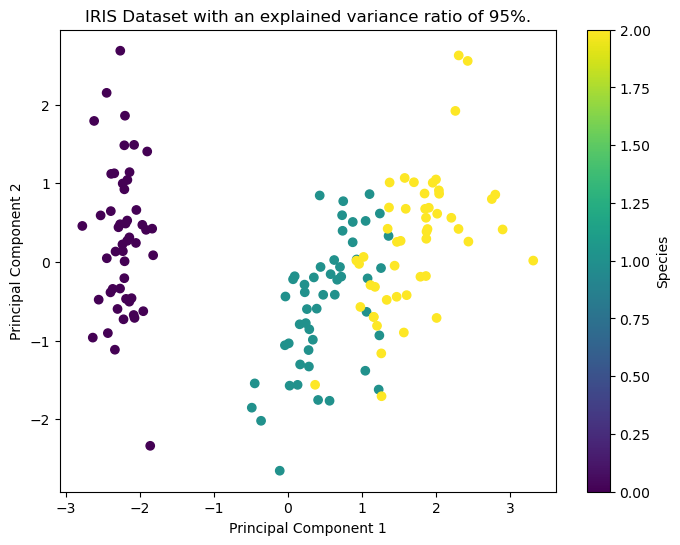

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('IRIS Dataset with an explained variance ratio of 95%.')
plt.colorbar(label='Species')
plt.show()

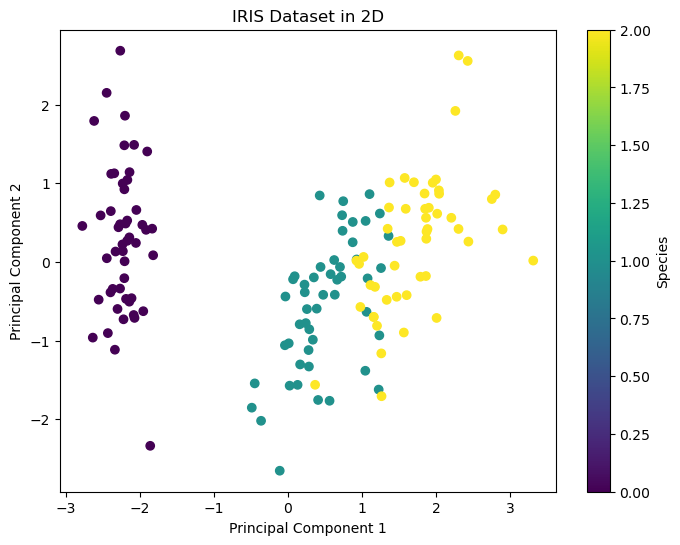

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('IRIS Dataset in 2D')
plt.colorbar(label='Species')
plt.show()


# 10) Compare the models from step 2 and find the best fit.

# 11) Predict using the model with the best fit model found in step 10.

# 12) Evaluate the performance of step 11.

In [9]:
# Train models and evaluate performance
best_model = None
best_accuracy = 0

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Accuracy for {model.__class__.__name__}: {accuracy}")
    print(f"Classification Report for {model.__class__.__name__}:\n {classification_report(y_test, y_pred)}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Predict using the best model
if best_model:
    y_pred_best = best_model.predict(X_test)
    accuracy_best = accuracy_score(y_test, y_pred_best)
    print(f"\nBest Model: {best_model.__class__.__name__}")
    print(f"Accuracy of Best Model: {accuracy_best}")
    print(f"Classification Report of Best Model:\n {classification_report(y_test, y_pred_best)}")
else:
    print("No best model found")



Accuracy for LinearSVC: 0.9333333333333333
Classification Report for LinearSVC:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Accuracy for SGDClassifier: 0.9666666666666667
Classification Report for SGDClassifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy for SVC: 0.9
Classification Report for SVC:
               

# 13) Using the same algorithm chosen from step 10, but the trained model on the reduced dataset from step 5 and step 6, predict and evaluate the performance.


In [10]:
# Train models and evaluate performance
best_model_2d = None
best_accuracy_2d = 0

for model in models:
    model.fit(X_train_2d, y_train_2d)
    y_pred_2d = model.predict(X_test_2d)
    accuracy_2d = accuracy_score(y_test_2d, y_pred_2d)
    
    print(f"Accuracy for {model.__class__.__name__}: {accuracy_2d}")
    print(f"Classification Report for {model.__class__.__name__}:\n {classification_report(y_test_2d, y_pred_2d)}")
    
    if accuracy_2d > best_accuracy_2d:
        best_accuracy_2d = accuracy_2d
        best_model_2d = model

# Predict using the best model
if best_model_2d:
    y_pred_best_2d = best_model_2d.predict(X_test_2d)
    accuracy_best_2d = accuracy_score(y_test_2d, y_pred_best_2d)
    print(f"\nBest Model: {best_model_2d.__class__.__name__}")
    print(f"Accuracy of Best Model: {accuracy_best_2d}")
    print(f"Classification Report of Best Model:\n {classification_report(y_test_2d, y_pred_best_2d)}")
else:
    print("No best model found")


Accuracy for LinearSVC: 0.9333333333333333
Classification Report for LinearSVC:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Accuracy for SGDClassifier: 0.9666666666666667
Classification Report for SGDClassifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

Accuracy for SVC: 0.9
Classification Report for SVC:
               